逻辑回归模型的估计概率（向量化形式）： $\hat{p}=h_{\theta}(x)=\sigma(x^{T}\theta)$

逻辑函数：$\sigma(t)=\frac{1}{1+exp(-t)}$

逻辑回归模型预测：$\hat{y} =
\left\{
\begin{array}{ll}
0, & \hat{p}<0.5 \\
1, & \hat{p}\geq 0.5
\end{array}
\right.$
         如果$x^T\theta$是正类，预测结果为1，如果是负类，则预测为0.

单个训练实例的成本函数：$c(\theta) =
\left\{
\begin{array}{ll}
-log(\hat{p}), & y=1 \\
-log(1-\hat{p}), & y=0
\end{array}
\right.$

逻辑回归成本函数（对数损失）：$J(\theta)=-\frac{1}{m}\sum^{m}_{i=1}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$

逻辑回归成本函数的偏导数： $\frac{\partial}{\partial \theta_{j}} = \frac{1}{m}\sum^{m}_{i=1}(\sigma(\theta^{T}x^{(i)})-y^{(i)})x^{(i)}_{j}$

array([1, 0])

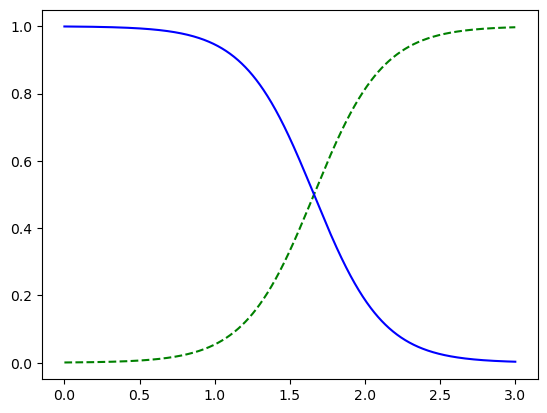

In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
list(iris.keys())
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X=iris["data"][:, 3:]
y=(iris["target"]==2).astype(int)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new=np.linspace(0, 3, 1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b-", label="Not Iris virginica")
log_reg.predict([[1.7], [1.5]])

softmax回归：

类k的softmax分数：$s_{k}(x)=x^{T}\theta{(k)}$

softmax函数：$\hat{p_{k}}=\sigma(s(x))_{k}=\frac{exp(s_{k}(x))}{\sum^{K}_{j=1}exp(s_{j}(x))}$  在等式中，K是类数，$s(x)$是一个向量，其中包含实例x的每个类的分数，$\sigma(s(x))_{k}$是实例x属于类k的估计概率，给定该实例每个类的分数

softmax回归分类预测：$\hat{y}=\underset{k}{\arg\max}\sigma(s(x))_{k}=\underset{k}{\arg\max}s_{k}(x)=\underset{k}{\arg\max}((\theta^{(k)})^Tx)$

softmax 回归分类器一次智能预测一个类，因此只能与互斥的类一起使用

交叉熵；用于衡量一组估算出的类概率跟目标类的匹配程度.定义为$H(p,q)=-\sum_{x}p(x)log(q(x))$

交叉熵成本函数：$J(\Theta) = -\frac{1}{m}\sum^{m}_{i=1}\sum^{K}_{k=1}y_{k}^{(i)}log(\hat{p_{k}}^{(i)})$

类k的交叉熵梯度向量：$\nabla_{\theta(k)}J(\Theta) = \frac{1}{m}\sum^{m}_{i=1}(\hat{p_{k}}^{(i)}-y_{k}^{(i)})x^{(i)}$

In [7]:
X=iris["data"][:, (2,3)]
y=iris["target"]
softmax_reg=LogisticRegression(solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5,2]]), softmax_reg.predict_proba([[5,2]])

(array([2]), array([[6.21626373e-07, 5.73689802e-02, 9.42630398e-01]]))